# Problem 1

In [1]:
!pip install dowhy
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 5.6 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 6.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.1/935.1 kB 5.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 7.8 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 6.1 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 5.7 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 7.9 MB/s  0:00:01eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 7.3 MB/

In [2]:
import numpy as np
import pandas as pd
from dowhy import CausalModel


/Users/shaza.ab/Documents/data-management-algorithms/EX2_shir/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

PATH = './so_countries_col_new.csv'  #change to your path
df = pd.read_csv(PATH)


df["RaceEthnicity"] = df["RaceEthnicity"].astype("category").cat.codes
df["UndergradMajor"] = df["UndergradMajor"].astype("category").cat.codes
df["DevType"] = df["DevType"].astype("category").cat.codes
df["Age"] = df["Age"].astype("category").cat.codes



In [4]:
from functions_P1 import make_formal_education_binary
df = make_formal_education_binary(df)
print(df.head())

   ID Hobby         Country         Student  \
0   0   Yes  United Kingdom              No   
1   2   Yes  United Kingdom              No   
2   3   Yes   United States              No   
3   4   Yes   United States              No   
4   5    No     Netherlands  Yes, full-time   

                                     FormalEducation  UndergradMajor  DevType  \
0           Bachelor's degree (BA, BS, B.Eng., etc.)               3        4   
1           Bachelor's degree (BA, BS, B.Eng., etc.)               6        0   
2  Some college/university study without earning ...               6        0   
3  Some college/university study without earning ...               7        0   
4  Secondary school (e.g. American high school, G...               6        0   

        YearsCoding  HoursComputer                    Exercise  ...  \
0  30 or more years    5 - 8 hours   Daily or almost every day  ...   
1         6-8 years   9 - 12 hours        1 - 2 times per week  ...   
2        9-11 yea

In [5]:

DAG = [
    'RaceEthnicity;',
    'Gender;',
    'Age;',
    'DevType;',
    'FormalEducation_binary;',
    'UndergradMajor;',
    'ConvertedSalary;',
    'RaceEthnicity -> ConvertedSalary;',
    'Gender -> DevType;',
    'Gender -> UndergradMajor;',
    'UndergradMajor -> DevType;',
    'UndergradMajor -> FormalEducation_binary;',
    'UndergradMajor -> ConvertedSalary;',
    'Age -> DevType;',
    'FormalEducation_binary -> DevType;',
    'FormalEducation_binary -> ConvertedSalary;',
    'RaceEthnicity -> FormalEducation_binary;',
    'RaceEthnicity -> DevType;',
    'Gender -> FormalEducation_binary;',
    'Age -> FormalEducation_binary;',
    'DevType -> ConvertedSalary;',
    'Gender -> ConvertedSalary;',
    'Age -> ConvertedSalary;'
]
causal_graph = """
                    digraph {
                """
for line in DAG:
    causal_graph = causal_graph + line + "\n"
causal_graph = causal_graph + "}"




In [6]:
treatment = 'FormalEducation_binary'
outcome  = 'ConvertedSalary'

**1.3.a**

In [7]:
### TODO: complete 'extract_confounders' ###
from functions_P1 import extract_confounders


In [8]:
print("\n=== Confounders ===")
confs = extract_confounders(DAG, treatment, outcome)
print(confs)


=== Confounders ===
{'Gender', 'RaceEthnicity', 'Age', 'UndergradMajor'}


**1.3.b**

In [9]:
### TODO: complete 'compute_emprical_ate' ###
from functions_P1 import compute_emprical_ate

In [10]:
print("\n=== Empirical ATE ===")
ate_emp = compute_emprical_ate(treatment, outcome, df, DAG)
print(f"Empirical ATE: {ate_emp}")


=== Empirical ATE ===
Confounders: {'Gender', 'RaceEthnicity', 'Age', 'UndergradMajor'}
Empirical ATE: 5943.5866750532205


**1.3.c**

In [11]:
from functions_P1 import compute_causal_effect_linear_reg
from functions_P1 import compute_causal_effect_prop

In [12]:
print("\n=== Linear Regression ATE ===")
ate_lr, p_lr = compute_causal_effect_linear_reg(
        treatment, outcome, df, confs
    )
print(f"Linear Regression ATE: {ate_lr} (p={p_lr})")



=== Linear Regression ATE ===
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                  ↪
─────────────────────────(E[ConvertedSalary|Gender,RaceEthnicity,Age,Undergrad ↪
d[FormalEducation_binary]                                                      ↪

↪        
↪ Major])
↪        
Estimand assumption 1, Unconfoundedness: If U→{FormalEducation_binary} and U→ConvertedSalary then P(ConvertedSalary|FormalEducation_binary,Gender,RaceEthnicity,Age,UndergradMajor,U) = P(ConvertedSalary|FormalEducation_binary,Gender,RaceEthnicity,Age,UndergradMajor)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Linear Regression ATE: 9330.1671744278 (p=[0.00018019])


In [13]:
print("\n=== Propensity Score Weighting ATE ===")
ate_psw = compute_causal_effect_prop(
        treatment, outcome, df, confs
    )
print(f"Propensity Score ATE: {ate_psw}")



=== Propensity Score Weighting ATE ===
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                  ↪
─────────────────────────(E[ConvertedSalary|Gender,RaceEthnicity,Age,Undergrad ↪
d[FormalEducation_binary]                                                      ↪

↪        
↪ Major])
↪        
Estimand assumption 1, Unconfoundedness: If U→{FormalEducation_binary} and U→ConvertedSalary then P(ConvertedSalary|FormalEducation_binary,Gender,RaceEthnicity,Age,UndergradMajor,U) = P(ConvertedSalary|FormalEducation_binary,Gender,RaceEthnicity,Age,UndergradMajor)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Propensity Score ATE: 8874.155801943736


**1.3.d**

In [14]:
from functions_P1 import make_undergrad_major_binary

df = make_undergrad_major_binary(df)
new_treatment = "UndergradMajor"

In [15]:
print("\n=== Confounders ===")
new_confs = extract_confounders(DAG, new_treatment, outcome)
print(new_confs)


=== Confounders ===
{'Gender'}


In [16]:
print("\n=== Empirical ATE ===")
new_ate_emp = compute_emprical_ate(new_treatment, outcome, df, DAG)
print(f"Empirical ATE: {new_ate_emp}")


=== Empirical ATE ===
Confounders: {'Gender'}
Empirical ATE: -5350.411057420963


In [17]:
print("\n=== Linear Regression ATE ===")
new_ate_lr, new_p_lr = compute_causal_effect_linear_reg(
        new_treatment, outcome, df, new_confs
    )
print(f"Linear Regression ATE: {new_ate_lr} (p={new_p_lr})")



=== Linear Regression ATE ===
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                   
─────────────────(E[ConvertedSalary|Gender])
d[UndergradMajor]                           
Estimand assumption 1, Unconfoundedness: If U→{UndergradMajor} and U→ConvertedSalary then P(ConvertedSalary|UndergradMajor,Gender,U) = P(ConvertedSalary|UndergradMajor,Gender)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Linear Regression ATE: -5311.373867556555 (p=[0.0192797])


In [18]:
print("\n=== Propensity Score Weighting ATE ===")
new_ate_psw = compute_causal_effect_prop(
        new_treatment, outcome, df, new_confs
    )
print(f"Propensity Score ATE: {new_ate_psw}")



=== Propensity Score Weighting ATE ===
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                   
─────────────────(E[ConvertedSalary|Gender])
d[UndergradMajor]                           
Estimand assumption 1, Unconfoundedness: If U→{UndergradMajor} and U→ConvertedSalary then P(ConvertedSalary|UndergradMajor,Gender,U) = P(ConvertedSalary|UndergradMajor,Gender)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Propensity Score ATE: -3789.4483767344063


In [19]:

print("\n========================")
### TODO: What treatment did you choose? ###
print(" Summary of ATE Estimates for treatment: UndergradMajor == CS")
print("========================")
print(f"Empirical ATE:     {new_ate_emp}")
print(f"Linear Regression ATE:          {new_ate_lr}  (p={new_p_lr})")
print(f"Propensity Score Weighting ATE: {new_ate_psw}")
print("========================\n")



 Summary of ATE Estimates for treatment: UndergradMajor == CS
Empirical ATE:     -5350.411057420963
Linear Regression ATE:          -5311.373867556555  (p=[0.0192797])
Propensity Score Weighting ATE: -3789.4483767344063



# Problem 3

In [20]:
!pip install efficient-apriori


**3.1**

In [ ]:

from efficient_apriori import apriori
### TODO: complete dataframe_to_transactions in functions_P3 ###
from functions_P3 import dataframe_to_transactions
df = pd.read_csv('./loan_approval_dataset.csv')
transactions = dataframe_to_transactions(df)
print(transactions[:5])

[('loan_id:1', ' no_of_dependents:2', 'education: Graduate', 'self_employed: No', ' income_annum:9600000', 'loan_amount:29900000', 'loan_term:12', 'cibil_score:778', 'residential_assets_value:2400000', 'commercial_assets_value:17600000', 'luxury_assets_value:22700000', 'bank_asset_value:8000000', 'loan_status: Approved'), ('loan_id:2', ' no_of_dependents:0', 'education: Not Graduate', 'self_employed: Yes', ' income_annum:4100000', 'loan_amount:12200000', 'loan_term:8', 'cibil_score:417', 'residential_assets_value:2700000', 'commercial_assets_value:2200000', 'luxury_assets_value:8800000', 'bank_asset_value:3300000', 'loan_status: Rejected'), ('loan_id:3', ' no_of_dependents:3', 'education: Graduate', 'self_employed: No', ' income_annum:9100000', 'loan_amount:29700000', 'loan_term:20', 'cibil_score:506', 'residential_assets_value:7100000', 'commercial_assets_value:4500000', 'luxury_assets_value:33300000', 'bank_asset_value:12800000', 'loan_status: Rejected'), ('loan_id:4', ' no_of_depend

In [22]:
itemsets, rules = apriori(transactions, min_support=0.5, min_confidence=0.5)
print(itemsets)
print(rules)
print(df.columns.tolist())
print(df.describe())

{1: {('education: Graduate',): 2144, ('loan_status: Approved',): 2656, ('self_employed: Yes',): 2150}}
[]
['loan_id', ' no_of_dependents', 'education', 'self_employed', ' income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']
           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term  cibil_s

**3.2**

In [23]:
### TODO: any additional code for q.3.2 ###


# IMPORTANT: copy all your code from problem 3.2, as is, to file "code_P3.py" #
# We will not try to run this code from the py file, but you have to copy and submit it over there.

#print(df.describe())
df.columns = df.columns.str.strip()

# ---- Residential assets: has vs does not have ----
df['res_assets_bin'] = pd.cut(
    df['residential_assets_value'],
    bins=[-float('inf'), 0, float('inf')],
    labels=['NoResidentialAssets', 'HasResidentialAssets']
)

df['res_assets_bin_2'] = pd.cut(
    df['residential_assets_value'],
    bins=[-float('inf'), 2.2e06, float('inf')],
    labels=['LowResidentialAssets', 'HighResidentialAssets']
)




transactions_apriori = dataframe_to_transactions(df)
itemsets, rules = apriori(transactions_apriori, min_support=0.9, min_confidence=0.9)
print("Residential assets bin: ≤ 0 = NoResidentialAssets, > 0 = HasResidentialAssets")
print(itemsets)
itemsets, rules = apriori(transactions_apriori, min_support=0.7, min_confidence=0.7)
print("Residential assets bin: ≤ 2.2e06 = LowResAssets, > 2.2e06 = HighResAssets")
print(itemsets)
#print(rules)

Residential assets bin: ≤ 0 = NoResidentialAssets, > 0 = HasResidentialAssets
{1: {('res_assets_bin:HasResidentialAssets',): 4196}}
Residential assets bin: ≤ 2.2e06 = LowResAssets, > 2.2e06 = HighResAssets
{1: {('res_assets_bin:HasResidentialAssets',): 4196, ('res_assets_bin_2:HighResidentialAssets',): 3165}, 2: {('res_assets_bin:HasResidentialAssets', 'res_assets_bin_2:HighResidentialAssets'): 3165}}


**3.3**

In [24]:
### TODO: any additional code for q.3.3 ###


# IMPORTANT: copy all your code from problem 3.3, as is, to file "code_P3.py" #
# We will not try to run this code from the py file, but you have to copy and submit it over there.
df['dependents_bin'] = pd.cut(
    df['no_of_dependents'],
    bins=[-float('inf'), 1, float('inf')],
    labels=['LowDependents', 'HighDependents']
)

df['income_bin'] = pd.cut(
    df['income_annum'],
    bins=[-float('inf'), 2.7e6, float('inf')],
    labels=['LowIncome', 'HighIncome']
)

df['loan_amount_bin'] = pd.cut(
    df['loan_amount'],
    bins=[-float('inf'), 7.7e6, float('inf')],
    labels=['SmallLoan', 'LargeLoan']
)

df['loan_term_bin'] = pd.cut(
    df['loan_term'],
    bins=[-float('inf'), 6, float('inf')],
    labels=['ShortTerm', 'LongTerm']
)

df['cibil_bin'] = pd.cut(
    df['cibil_score'],
    bins=[-float('inf'), 450, float('inf')],
    labels=['LowCredit', 'HighCredit']
)

df['com_assets_bin'] = pd.cut(
    df['commercial_assets_value'],
    bins=[-float('inf'), 1.3e6, float('inf')],
    labels=['LowComAssets', 'HighComAssets']
)

df['lux_assets_bin'] = pd.cut(
    df['luxury_assets_value'],
    bins=[-float('inf'), 7.5e6, float('inf')],
    labels=['LowLuxuryAssets', 'HighLuxuryAssets']
)

df['bank_assets_bin'] = pd.cut(
    df['bank_asset_value'],
    bins=[-float('inf'), 2.3e6, float('inf')],
    labels=['LowBankAssets', 'HighBankAssets']
)
transactions_apriori = dataframe_to_transactions(df)
itemsets, rules = apriori(transactions_apriori, min_support=0.5, min_confidence=0.7)
print("\nAssociation Rules:")
for rule in rules:
    if tuple(rule.rhs) == ('loan_status: Approved',):
        print(f"{tuple(rule.lhs)}  -->  {tuple(rule.rhs)}")


Association Rules:
('cibil_bin:HighCredit',)  -->  ('loan_status: Approved',)
('cibil_bin:HighCredit', 'res_assets_bin:HasResidentialAssets')  -->  ('loan_status: Approved',)


# Problem 4

In [28]:
import matplotlib.pyplot as plt

In [29]:
import numpy as np
from scipy.special import kl_div

def safe_kl_div(P, Q, epsilon=1e-10):
    """
    Compute the KL divergence KL(P || Q) safely, handling zeros.

    Parameters
    ----------
    P : array-like
        True probability distribution (must sum to 1).
    Q : array-like
        Approximate probability distribution (must sum to 1).
    epsilon : float
        Small value to replace zeros for numerical stability.

    Returns
    -------
    kl_total : float
        Total KL divergence KL(P || Q)

    """
    P = np.asarray(P)
    Q = np.asarray(Q)

    # Clip to avoid log(0)
    P_safe = np.clip(P, epsilon, 1)
    Q_safe = np.clip(Q, epsilon, 1)

    # Normalize just in case
    P_safe = P_safe / P_safe.sum()
    Q_safe = Q_safe / Q_safe.sum()

    # Element-wise KL divergence
    kl_elementwise = kl_div(P_safe, Q_safe)

    # Total KL divergence
    kl_total = np.sum(kl_elementwise)

    return kl_total


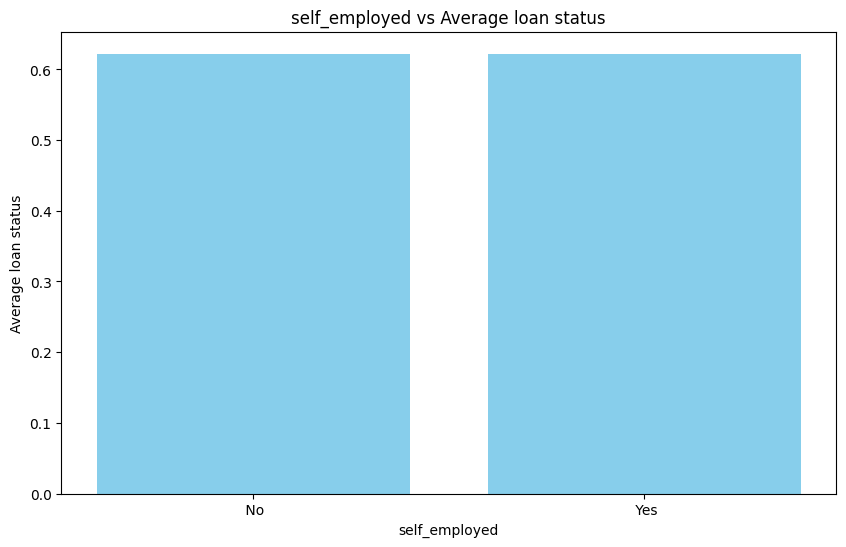

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_binary
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


In [30]:

df = pd.read_csv('./loan_approval_dataset.csv')


# Convert loan_status to numeric binary
df['loan_status_binary'] = df['loan_status'].map({' Approved': 1, ' Rejected': 0})


# Calculate the average loan_status vs self_employed
average_loan_status = df.groupby('self_employed')['loan_status_binary'].mean().reset_index()


# Plot the graph as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_loan_status['self_employed'], average_loan_status['loan_status_binary'], color='skyblue')
plt.xlabel('self_employed')
plt.ylabel('Average loan status')
plt.title('self_employed vs Average loan status')
plt.show()

df.describe()

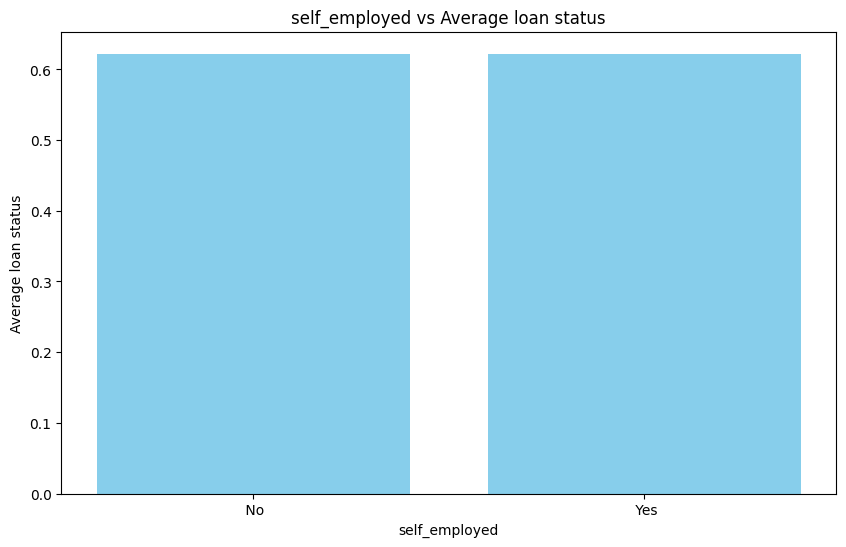

entire data
  self_employed  loan_status_binary
0            No            0.621992
1           Yes            0.622326
over a subpopulation
  self_employed  loan_status_binary
0            No            0.618447
1           Yes            0.621005
KL divergence: 1.6115641708336348e-06


In [31]:
######Exampel#############

df_graduate = df[df['education'] == ' Not Graduate']



# Calculate the average loan_status vs self_employed
average_loan_status_pattern = df_graduate.groupby('self_employed')['loan_status_binary'].mean().reset_index()


# Plot the graph as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_loan_status['self_employed'], average_loan_status['loan_status_binary'], color='skyblue')
plt.xlabel('self_employed')
plt.ylabel('Average loan status')
plt.title('self_employed vs Average loan status')
plt.show()


print("entire data")
avg1 = average_loan_status.sort_values('self_employed')
print(avg1)
print("over a subpopulation")
avg2 = average_loan_status_pattern.sort_values('self_employed')
print(avg2)



Q = avg1['loan_status_binary'].values
P = avg2['loan_status_binary'].values

kl_value = safe_kl_div(P, Q)
print("KL divergence:", kl_value)





**RESULTS:**

--- Entire Data (Global Trend) ---
             term_bin  loan_status_binary
0     ShortTerm (<8y)            0.685003
1  MediumTerm (8-14y)            0.573631
2     LongTerm (>14y)            0.585542


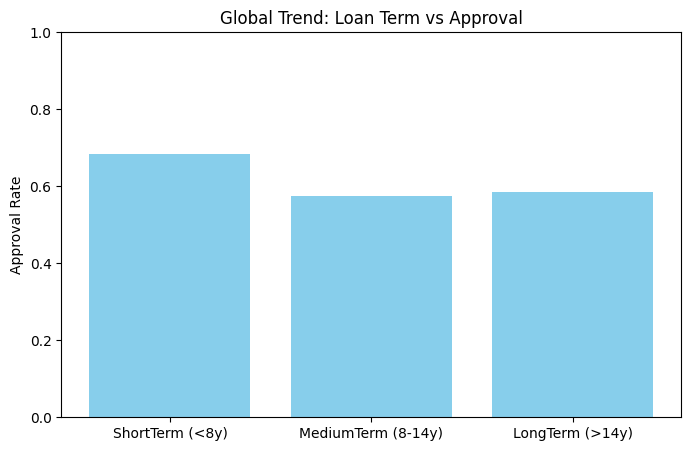


--- Subpopulation (Low CIBIL Score) ---
             term_bin  loan_status_binary
0     ShortTerm (<8y)            0.255525
1  MediumTerm (8-14y)            0.000000
2     LongTerm (>14y)            0.000000


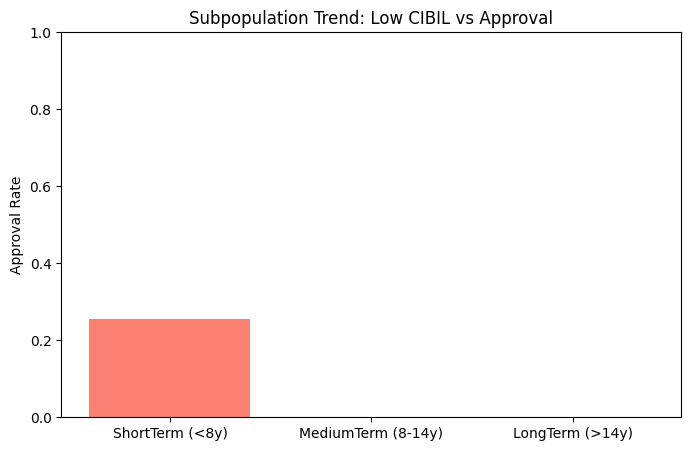

KL Divergence Score: 0.9903650443803382


In [32]:
# --- 1. Load and Preprocess ---
df = pd.read_csv('./loan_approval_dataset.csv')
df.columns = df.columns.str.strip()
df['loan_status_binary'] = df['loan_status'].map({' Approved': 1, ' Rejected': 0})

# --- 2. Define the Column (Loan Term) ---
# We bin loan_term into Short, Medium, Long to make it categorical
def term_bin(t):
    if t <= 8:
        return 'ShortTerm (<8y)'
    elif t <= 14:
        return 'MediumTerm (8-14y)'
    else:
        return 'LongTerm (>14y)'

df['term_bin'] = df['loan_term'].apply(term_bin)

# Order for plotting
order = ['ShortTerm (<8y)', 'MediumTerm (8-14y)', 'LongTerm (>14y)']

# --- 3. Global Plot (Entire Data) ---
avg_all = (
    df.groupby('term_bin')['loan_status_binary']
      .mean()
      .reindex(order)
      .reset_index()
)

print("--- Entire Data (Global Trend) ---")
print(avg_all)

plt.figure(figsize=(8, 5))
plt.bar(avg_all['term_bin'], avg_all['loan_status_binary'], color='skyblue')
plt.title('Global Trend: Loan Term vs Approval')
plt.ylim(0, 1)
plt.ylabel('Approval Rate')
plt.show()

# --- 4. Define Subpopulation (Borderline/Low CIBIL) ---
# We look at people with scores between 300 and 550.
# These are "risky" applicants where term length matters more.
df_sub = df[
    (df['cibil_score'] >= 300) & 
    (df['cibil_score'] <= 549)
]

avg_sub = (
    df_sub.groupby('term_bin')['loan_status_binary']
          .mean()
          .reindex(order) 
          .reset_index()
)

print("\n--- Subpopulation (Low CIBIL Score) ---")
print(avg_sub)

plt.figure(figsize=(8, 5))
plt.bar(avg_sub['term_bin'], avg_sub['loan_status_binary'], color='salmon')
plt.title('Subpopulation Trend: Low CIBIL vs Approval')
plt.ylim(0, 1)
plt.ylabel('Approval Rate')
plt.show()


Q = avg_all['loan_status_binary'].values

# P = Target Distribution (Subpopulation Trend)
P = avg_sub['loan_status_binary'].values

# 2. Compute KL Divergence
# The function will automatically handle normalizing them so they sum to 1
divergence_score = safe_kl_div(P, Q)

print(f"KL Divergence Score: {divergence_score}")

In [33]:
counts = pd.crosstab(df_sub['term_bin'], columns='count')

print("--- Counts for Low CIBIL Subpopulation ---")
print(counts)

--- Counts for Low CIBIL Subpopulation ---
col_0               count
term_bin                 
LongTerm (>14y)       513
MediumTerm (8-14y)    548
ShortTerm (<8y)       724
